In [153]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [155]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from scipy.io import loadmat
% matplotlib inline

In [156]:
def closest_centroids(X, centroids):
    m = X.shape[0]
    k = centroids.shape[0]
    idx  = np.zeros(m)
       
    for i in range(m):
        min_dist = 1000000
        for j in range(k):
            dist = np.sum((X[i,:] - centroids[j,:])**2)
            if dist < min_dist:
                min_dist = dist
                idx[i] = j
    return idx
            
            

In [157]:
data = loadmat('data/ex7data2.mat')
X = data['X']
initial_centroids = np.array([[3, 3], [6, 2], [8, 5]])

idx = closest_centroids(X,  initial_centroids)
idx[0:10]

array([ 0.,  2.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

In [158]:
def get_centroids(X, idx, k):  
    m, n = X.shape
    centroids = np.zeros((k, n))

    for i in range(k):
        indices = np.where(idx == i)
        centroids[i,:] = (np.sum(X[indices,:], axis=1) / len(indices[0])).ravel()

    return centroids

get_centroids(X, idx, 3) 

array([[ 2.42830111,  3.15792418],
       [ 5.81350331,  2.63365645],
       [ 7.11938687,  3.6166844 ]])

In [159]:
def run_k_means(X, initial_centroids, max_iters):  
    m, n = X.shape
    k = initial_centroids.shape[0]
    idx = np.zeros(m)
    centroids = initial_centroids

    for i in range(max_iters):
        idx = closest_centroids(X, centroids)
        centroids = get_centroids(X, idx, k)

    return idx, centroids

idx, centroids = run_k_means(X, initial_centroids, 10) 

idx, centroids

(array([ 0.,  2.,  2.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  2.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.

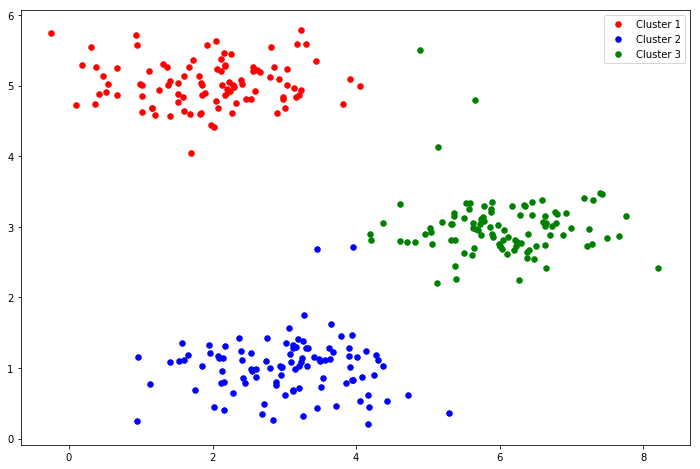

In [160]:
cluster1 = X[np.where(idx == 0)[0],:]
cluster2 = X[np.where(idx == 1)[0],:]
cluster3 = X[np.where(idx == 2)[0],:]

fig, ax = plt.subplots(figsize = (12,8))

ax.scatter(cluster1[:,0], cluster1[:,1], s=30, c='r', label = 'Cluster 1')
ax.scatter(cluster2[:,0], cluster2[:,1], s=30, c='b', label = 'Cluster 2')
ax.scatter(cluster3[:,0], cluster3[:,1], s=30, c='g', label = 'Cluster 3')

ax.legend();

In [161]:
def init_centroids(X, k):  
    m, n = X.shape
    centroids = np.zeros((k, n))
    idx = np.random.randint(0, m, k)

    for i in range(k):
        centroids[i,:] = X[idx[i],:]

    return centroids

initial_centroids = init_centroids(X, 3)

### Image Compression

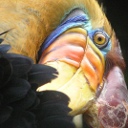

In [162]:
from IPython.display import Image
Image(filename='data/bird_small.png')

In [163]:
image_data = loadmat('data/bird_small.mat')  
image_data 

{'A': array([[[219, 180, 103],
         [230, 185, 116],
         [226, 186, 110],
         ..., 
         [ 14,  15,  13],
         [ 13,  15,  12],
         [ 12,  14,  12]],
 
        [[230, 193, 119],
         [224, 192, 120],
         [226, 192, 124],
         ..., 
         [ 16,  16,  13],
         [ 14,  15,  10],
         [ 11,  14,   9]],
 
        [[228, 191, 123],
         [228, 191, 121],
         [220, 185, 118],
         ..., 
         [ 14,  16,  13],
         [ 13,  13,  11],
         [ 11,  15,  10]],
 
        ..., 
        [[ 15,  18,  16],
         [ 18,  21,  18],
         [ 18,  19,  16],
         ..., 
         [ 81,  45,  45],
         [ 70,  43,  35],
         [ 72,  51,  43]],
 
        [[ 16,  17,  17],
         [ 17,  18,  19],
         [ 20,  19,  20],
         ..., 
         [ 80,  38,  40],
         [ 68,  39,  40],
         [ 59,  43,  42]],
 
        [[ 15,  19,  19],
         [ 20,  20,  18],
         [ 18,  19,  17],
         ..., 
         [ 65,  43

In [164]:
A = image_data['A']  
A.shape  

(128, 128, 3)

In [186]:
# normalize value ranges
A = A / 255.

# reshape the array
X = np.reshape(A, (A.shape[0] * A.shape[1], A.shape[2]))
X.shape

(16384, 3)

In [170]:
# randomly initialize the centroids
initial_centroids = init_centroids(X, 16)

# run the algorithm
idx, centroids = run_k_means(X, initial_centroids, 10)

# get the closest centroids one last time
idx = closest_centroids(X, centroids)

# map each pixel to the centroid value
X_recovered = centroids[idx.astype(int),:]

# reshape to the original dimensions
X_recovered = np.reshape(X_recovered, (A.shape[0], A.shape[1], A.shape[2]))

X_recovered.shape, centroids.shape

((128, 128, 3), (16, 3))

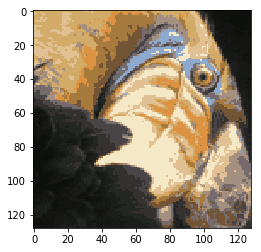

In [168]:
plt.imshow(X_recovered);  

In [185]:
idx.astype(int)

array([14, 14, 14, ...,  5,  5, 13])

In [182]:
centroids[idx.astype(int),:].shape

(16384, 3)

In [176]:
centroids

array([[ 0.74363122,  0.58791855,  0.32294118],
       [ 0.52696973,  0.44201965,  0.3967824 ],
       [ 0.65411924,  0.57977631,  0.51949063],
       [ 0.43583532,  0.31741082,  0.21191074],
       [ 0.3172365 ,  0.32826502,  0.37395059],
       [ 0.22914143,  0.21306163,  0.20384971],
       [ 0.97571868,  0.89647308,  0.71263293],
       [ 0.9664889 ,  0.95604934,  0.85627559],
       [ 0.07804356,  0.08458985,  0.07422437],
       [ 0.91754757,  0.57239149,  0.25184264],
       [ 0.47005554,  0.5749745 ,  0.77157429],
       [ 0.94685919,  0.8130719 ,  0.55738234],
       [ 0.63140043,  0.45560357,  0.19782548],
       [ 0.1327515 ,  0.14024553,  0.13149939],
       [ 0.84843969,  0.70246665,  0.44748038],
       [ 0.78691964,  0.73414101,  0.73100681]])

In [183]:
centroids[idx.astype(int),:]

array([[ 0.84843969,  0.70246665,  0.44748038],
       [ 0.84843969,  0.70246665,  0.44748038],
       [ 0.84843969,  0.70246665,  0.44748038],
       ..., 
       [ 0.22914143,  0.21306163,  0.20384971],
       [ 0.22914143,  0.21306163,  0.20384971],
       [ 0.1327515 ,  0.14024553,  0.13149939]])